In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Model import NeuralNetwork as nn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Loading Data

In [18]:
data_path = 'D:\\Nhat\\term_8\\Data warehouse and data mining\\code\\MushroomDataset\\mushrooms.csv'
df = pd.read_csv(data_path)

In [21]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
df['class'] = df['class'].replace({'p':0,'e':1})

In [22]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

c:\Users\nhat2\anaconda3\envs\speech\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\nhat2\anaconda3\envs\speech\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\nhat2\anaconda3\envs\speech\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\nhat2\anaconda3\envs\speech\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

In [23]:
df = df.sample(frac=1,random_state=42).reset_index(drop=True)
#df.head()
Y = df['class']
X = df.drop(['class'], axis=1)

In [24]:
#split train data
train_data, remaining_data, train_label, remaining_label = train_test_split(X, Y, test_size=0.3, random_state=42)

#split test and validation data
test_data, validation_data, test_label, validation_label = train_test_split(remaining_data, remaining_label, test_size=0.5, random_state=42)

In [25]:
train_data = train_data.to_numpy().T
train_label = train_label.to_numpy()
test_data = test_data.to_numpy().T
test_label = test_label.to_numpy()
validation_data = validation_data.to_numpy().T
validation_label = validation_label.to_numpy()

In [26]:
train_label = train_label.reshape(1, train_label.shape[0])
test_label = test_label.reshape(1, test_label.shape[0])
validation_label = validation_label.reshape(1, validation_label.shape[0])

In [27]:
layers_dims = [train_data.shape[0],15,7,1]

model = nn(layers_dims)

model.train(X=train_data,Y=train_label,X_val=validation_data,Y_val=validation_label,learning_rate=0.001,num_epochs=500,batch_size=32,lambd=0.7,print_cost=True)

Cost after epoch 0: 1.3410716196190342, Cost validation: 0.7700048000714466
Cost after epoch 1: 1.166175660135394, Cost validation: 0.6108121216307398
Cost after epoch 2: 1.1038068649568624, Cost validation: 0.5405957802268576
Cost after epoch 3: 1.0632177315425257, Cost validation: 0.5064848987620103
Cost after epoch 4: 1.035896312883048, Cost validation: 0.45347213818685395
Cost after epoch 5: 1.014496146178279, Cost validation: 0.5654599547474195
Cost after epoch 6: 0.9975111268640247, Cost validation: 0.4735348778090857
Cost after epoch 7: 0.9829944764412599, Cost validation: 0.46378702219863405
Cost after epoch 8: 0.9690199763694501, Cost validation: 0.32392076964071553
Cost after epoch 9: 0.9559675578389002, Cost validation: 0.4624237991919257
Cost after epoch 10: 0.9431621951537748, Cost validation: 0.32989424451236404
Cost after epoch 11: 0.9302434618475585, Cost validation: 0.4871584655113186
Cost after epoch 12: 0.918765635134798, Cost validation: 0.43528301430232125
Cost aft

In [ ]:
model.predict(test_data, test_label)

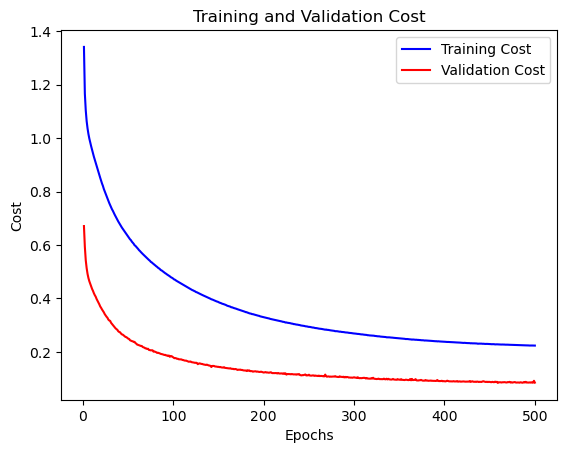

In [28]:
epochs = range(1, len(model.costs_epoch) + 1)

plt.plot(epochs, model.costs_epoch, 'b', label='Training Cost')
plt.plot(epochs, model.valid_cost, 'r', label='Validation Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training and Validation Cost')
plt.legend()
plt.show()

In [11]:
train_data.shape

(22, 5686)

Epoch 1/50, Train Loss: 0.5825527295302809, Valid Loss: 0.39833871905620283
Epoch 2/50, Train Loss: 0.2979344023245104, Valid Loss: 0.2800340975324313
Epoch 3/50, Train Loss: 0.22427653931499866, Valid Loss: 0.233848936855793
Epoch 4/50, Train Loss: 0.18768013048958912, Valid Loss: 0.20818642374032584
Epoch 5/50, Train Loss: 0.15952585648033726, Valid Loss: 0.16715823687039888
Epoch 6/50, Train Loss: 0.13434218008364185, Valid Loss: 0.1385236722536576
Epoch 7/50, Train Loss: 0.11235552481009384, Valid Loss: 0.11740673600863187
Epoch 8/50, Train Loss: 0.09519745706674758, Valid Loss: 0.09925418261152047
Epoch 9/50, Train Loss: 0.07945123393339722, Valid Loss: 0.08666186220943928
Epoch 10/50, Train Loss: 0.06807311494531257, Valid Loss: 0.08269179312703319
Epoch 11/50, Train Loss: 0.060459826711900116, Valid Loss: 0.0641957534572635
Epoch 12/50, Train Loss: 0.053086630597166465, Valid Loss: 0.05625744254734272
Epoch 13/50, Train Loss: 0.04706133304038242, Valid Loss: 0.054061115599977665

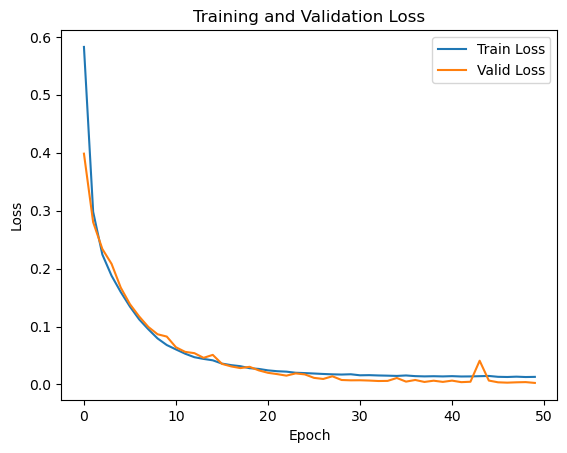

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Xác định kiến trúc mạng neural
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.output_layer = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        output = self.sigmoid(self.output_layer(x))
        return output

# Khởi tạo mạng neural
input_size = 22   # Kích thước đầu vào của mạng
hidden_size1 = 15  # Kích thước lớp ẩn thứ nhất
hidden_size2 = 7  # Kích thước lớp ẩn thứ hai
output_size = 1    # Kích thước đầu ra của mạng

model = NeuralNetwork()

# Xác định hàm mất mát và thuật toán tối ưu hóa
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Chuyển đổi dữ liệu thành TensorDataset và DataLoader
train_data_tensor = torch.from_numpy(train_data.T).float()
train_label_tensor = torch.from_numpy(train_label.T).float()
train_dataset = TensorDataset(train_data_tensor, train_label_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

valid_data_tensor = torch.from_numpy(validation_data.T).float()
valid_label_tensor = torch.from_numpy(validation_label.T).float()
valid_dataset = TensorDataset(valid_data_tensor, valid_label_tensor)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# Huấn luyện mạng neural
train_losses = []
valid_losses = []

num_epochs = 50
lambd = 0.01

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_train_loss = 0

    for X_batch, Y_batch in train_loader:
        # Forward pass: tính toán đầu ra dự đoán cho mini-batch
        train_outputs = model(X_batch)
        train_loss = criterion(train_outputs, Y_batch)
        
        # Compute L2 regularization term
        l2_regularization_loss = 0
        for param in model.parameters():
            l2_regularization_loss += torch.norm(param)**2
        l2_regularization_loss = (lambd / (2 * len(train_data))) * l2_regularization_loss

        # Add L2 regularization loss to the total loss
        loss = train_loss + l2_regularization_loss

        # Backward pass: tính toán gradient và cập nhật trọng số
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        epoch_valid_loss = 0
        for X_batch, Y_batch in valid_loader:
            valid_outputs = model(X_batch)
            valid_loss = criterion(valid_outputs, Y_batch)
            epoch_valid_loss += valid_loss.item()

        epoch_valid_loss /= len(valid_loader)
        valid_losses.append(epoch_valid_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss}, Valid Loss: {epoch_valid_loss}')

# Vẽ đồ thị của kết quả huấn luyện và validation qua các epoch
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [16]:
print(test_label)

[[1 0 0 ... 0 1 0]]


In [17]:
def evaluate(model,test_data,test_label):
    
    num_samples = test_data.shape[1]
    
    predictions = model.predict(test_data,test_label).astype(int)
    
    correct_pre = np.sum(predictions == test_label)
    
    accuracy = correct_pre/num_samples
    print('Accuracy:',accuracy)
    confusion_matrix = np.zeros((2,2))
    for i in range(num_samples):
        true_label = test_label[0,i]
        pre_label = predictions[0,i]
        confusion_matrix[true_label][pre_label] += 1
    
    print('Confusion Matrix:')
    print(confusion_matrix)
   
    true_positive = confusion_matrix[1][1]
    false_positive = confusion_matrix[0][1]
    true_negative = confusion_matrix[0][0]
    false_negative = confusion_matrix[1][0]
    
    precision = true_positive/(true_positive + false_positive)
    print('Precision:',precision)
    recall = true_positive/(true_positive + false_negative)
    print('Recall:',recall)
    f1_score = 2*precision*recall/(precision + recall)
    print('F1 Score:',f1_score)
    evaluation_metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }
    return evaluation_metrics
    

In [ ]:
evaluate(model,test_data,test_label)

In [ ]:
def compute_fpr_tpr(y_true, y_scores, thresholds):
    fpr_tpr = []
    for thresh in thresholds:
        tp = fp = tn = fn = 0
        for i in range(len(y_true)):
            if y_scores[i] >= thresh:
                if y_true[i] == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if y_true[i] == 0:
                    tn += 1
                else:
                    fn += 1
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr_tpr.append((fpr, tpr))
    return fpr_tpr

def compute_auc(fpr_tpr):
    auc = 0.0
    fpr_tpr = sorted(fpr_tpr)
    for i in range(1, len(fpr_tpr)):
        x1, y1 = fpr_tpr[i - 1]
        x2, y2 = fpr_tpr[i]
        auc += (x2 - x1) * (y1 + y2) / 2
    return auc

def plot_roc(fpr_tpr):
    fpr_tpr = sorted(fpr_tpr)
    fpr, tpr = zip(*fpr_tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

def plot_roc_auc(y_true, y_scores):
    thresholds = np.linspace(0, 1, num=100)
    fpr_tpr = compute_fpr_tpr(y_true, y_scores, thresholds)
    auc = compute_auc(fpr_tpr)
    
    print("ROC Points:")
    plot_roc(fpr_tpr)
    
    print(f"AUC: {auc:.2f}")
    return auc

plot_roc_auc(test_label[0], model.predict(test_data, test_label)[0])